# MIDTERM_DATA601


## Provisional COVID-19, neumonia, and influenza death counts by age, gender and place

Dataset Url - https://data.cdc.gov/NCHS/Provisional-COVID-19-Deaths-by-Sex-and-Age/9bhg-hcku

Group Members: Pooja Anil and Sanjana Tripathi

This Dataset holds the data of the death reported by COVID-19, neumonia, and influenza by age, gender, and place as of the date 3/2/2022 for the duration between 2020-22. This dataset has a grouped structure which has been grouped by "Total", "Year", and "Month" initially. Under these groups it has been further grouped into "States"(United States as a whole and all the other states in US), "Gender"("All Sexes", "Male", and "Female"), and Age Groups from 0 to 85+.

The columns of the dataset are below;
1. Data_As_Of - The date that the data was extracted 

2. Start_Date - The start date of the duration for which the death counts has been taken. 

3. End_Date - The end date of the duration for which the death counts has been taken.     

4. Group - The object type column has been used to group the data by Total, year and month.                                                              
5. Year - Contains the year for which the count was recorded.

6. Month - Contains the month for which the count was recorded. 

7. State - Contains the states for which the count belongs to.

8. Sex - The object type column has been used to group the data by All Sexes, Female, Male.                              
9. Age_Groupn - The column contains all the age group for its respective death counts.       

10. COVID_19_Deaths - the float type column contains the total COVID-19 death count by state, age, and sex.               
11. Total_Deaths - the float type column contains the total death count by state, age, and sex.                          
12. Pneumonia_Deaths - the float type column contains the total pneumonia death count by state, age, and sex.             
13. Pneumonia_and_COVID-19_Deaths - the float type column contains the total Pneumonia and COVID-19 death count by state, age, and sex. 

14. Influenza_Deaths - the float type column contains the total Influenza death count by state, age, and sex.             
15. Pneumonia_Influenza_or_COVID-19_Deaths - the float type column contains the total Pneumonia, Influenza, or, 
COVID-19 count by state, age, and sex.

16. Footnote - Contains additional note for the rows with missing/NaN values.                               


NOTE: 
1. This dataset shows the number of deaths that were reported to National Center for Health Statistics and not all the deaths in that duration.
2. The whole dataset can be seen as three groups of data based on the column "Group". This column groups the counts of dealth by covid, pneumonia and influenza by "Total"(from 01/01/2020 to 02/26/2022), "Year", and "Month.

### Importing library

In [77]:
#importing all the libraries 
import pandas as pd
import pandas
import numpy as np
import random
import seaborn as sns
from matplotlib import pyplot as plt

### Loading the Data

In [78]:
url = "Provisional_COVID-19_Deaths_by_Sex_and_Age-2.csv"
#reading a csv file 
data = pandas.read_csv(url, na_values = "NaN", on_bad_lines='skip')
data.rename(columns = {'Data As Of': 'Data_As_Of', 'Start Date': 'Start_Date', 'End Date':'End_Date', 'Age Group':'Age_Group','COVID-19 Deaths':'COVID_19_Deaths','Total Deaths':'Total_Deaths', 'Pneumonia Deaths':'Pneumonia_Deaths', 'Pneumonia and COVID-19 Deaths':'Pneumonia_and_COVID-19_Deaths', 'Influenza Deaths':'Influenza_Deaths', 'Pneumonia, Influenza, or COVID-19 Deaths':'Pneumonia_Influenza_or_COVID-19_Deaths'}, inplace = True)

Here, The blank spaces in the column names are being removed, as referring to a blank space going further can get tricky!

In [79]:
data.head() 

,Data_As_Of,Start_Date,End_Date,Group,Year,Month,State,Sex,Age_Group,COVID_19_Deaths,Total_Deaths,Pneumonia_Deaths,Pneumonia_and_COVID-19_Deaths,Influenza_Deaths,Pneumonia_Influenza_or_COVID-19_Deaths,Footnote
0,03/02/2022,01/01/2020,02/26/2022,By Total,NaN,NaN,United States,All Sexes,All Ages,944650.0,7297815.0,830505.0,489420.0,10462.0,1294658.0,NaN
1,03/02/2022,01/01/2020,02/26/2022,By Total,NaN,NaN,United States,All Sexes,Under 1 year,224.0,40604.0,476.0,27.0,27.0,699.0,NaN
2,03/02/2022,01/01/2020,02/26/2022,By Total,NaN,NaN,United States,All Sexes,0-17 years,865.0,72039.0,1407.0,241.0,198.0,2228.0,NaN
3,03/02/2022,01/01/2020,02/26/2022,By Total,NaN,NaN,United States,All Sexes,1-4 years,101.0,7562.0,281.0,26.0,67.0,423.0,NaN
4,03/02/2022,01/01/2020,02/26/2022,By Total,NaN,NaN,United States,All Sexes,5-14 years,268.0,12071.0,411.0,93.0,81.0,667.0,NaN


### Preprocessing

In [80]:
#Getting the Number of Rows and Columns of the dataset
data.shape 

(82620, 16)

In [81]:
#Getting the data types of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82620 entries, 0 to 82619
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Data_As_Of                              82620 non-null  object 
 1   Start_Date                              82620 non-null  object 
 2   End_Date                                82620 non-null  object 
 3   Group                                   82620 non-null  object 
 4   Year                                    79866 non-null  float64
 5   Month                                   71604 non-null  float64
 6   State                                   82620 non-null  object 
 7   Sex                                     82620 non-null  object 
 8   Age_Group                               82620 non-null  object 
 9   COVID_19_Deaths                         61977 non-null  float64
 10  Total_Deaths                            70918 non-null  fl

### Sanity Check

In [82]:
#Getting features of numeric columns
data.describe()

,Year,Month,COVID_19_Deaths,Total_Deaths,Pneumonia_Deaths,Pneumonia_and_COVID-19_Deaths,Influenza_Deaths,Pneumonia_Influenza_or_COVID-19_Deaths
count,79866.000000,71604.000000,61977.000000,7.091800e+04,58010.000000,62127.000000,68553.000000,5.885100e+04
mean,2020.655172,6.115385,412.245430,2.811518e+03,386.518497,214.188517,3.835252,5.933716e+02
std,0.657893,3.576948,6450.033524,4.629548e+04,5870.832138,3367.947915,76.419665,9.054538e+03
min,2020.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
25%,2020.000000,3.000000,0.000000,4.300000e+01,0.000000,0.000000,0.000000,0.000000e+00
50%,2021.000000,6.000000,13.000000,1.580000e+02,20.000000,0.000000,0.000000,2.900000e+01
75%,2021.000000,9.000000,79.000000,6.920000e+02,91.000000,39.000000,0.000000,1.355000e+02
max,2022.000000,12.000000,944650.000000,7.297815e+06,830505.000000,489420.000000,10462.000000,1.294658e+06


The min and max value of the death counts are sensible. 


In [83]:
age = data.Age_Group.value_counts()
age

All Ages             4860
35-44 years          4860
75-84 years          4860
65-74 years          4860
55-64 years          4860
50-64 years          4860
45-54 years          4860
40-49 years          4860
30-39 years          4860
Under 1 year         4860
25-34 years          4860
18-29 years          4860
15-24 years          4860
5-14 years           4860
1-4 years            4860
0-17 years           4860
85 years and over    4860
Name: Age_Group, dtype: int64

Here, the age includes constant age groups with some additional age groups like 0-17, 18-29, 30-49, and 50-64. As per CDC, these are consistent with categories used across CDC. The extra age groups can be removed. 

Hypothetically, the decision for removing the extra age data to get a better visualization is done on the following,

1. The CDC has a note attached to the dataset that says that the extra age categories were routinely included and are consistent with the categories used in CDC.
2. When a sample for 3 years of data taken for Alaska for all sexes, the total death count for all ages is equal to the sum of only the data in standard category. This total excludes the extra categories added.

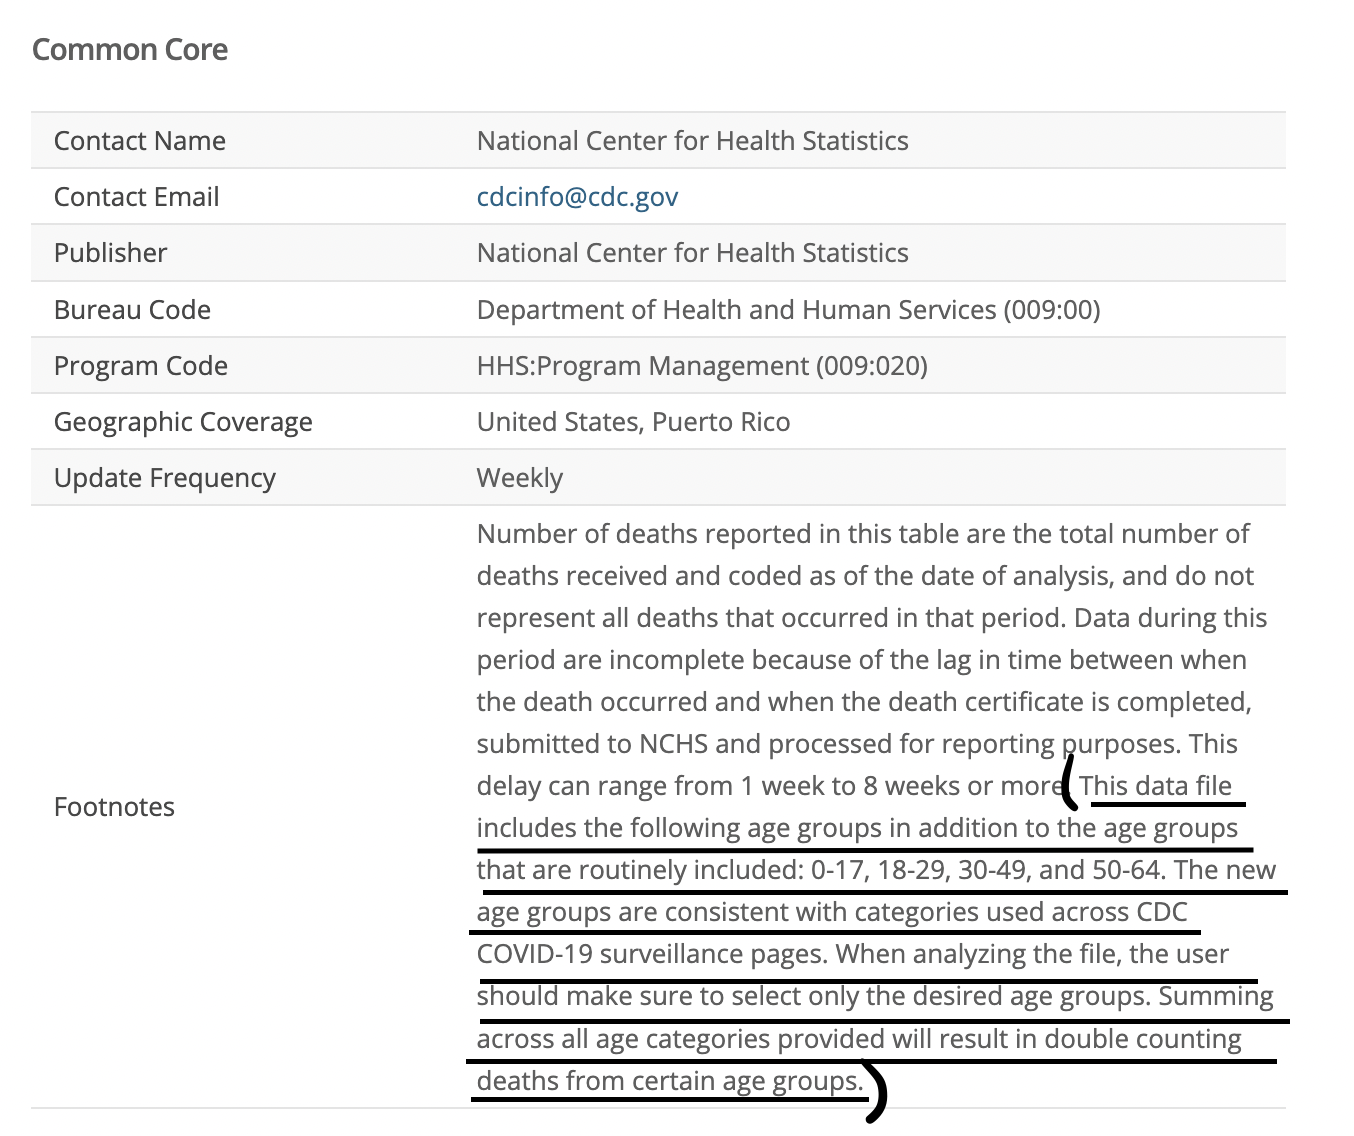

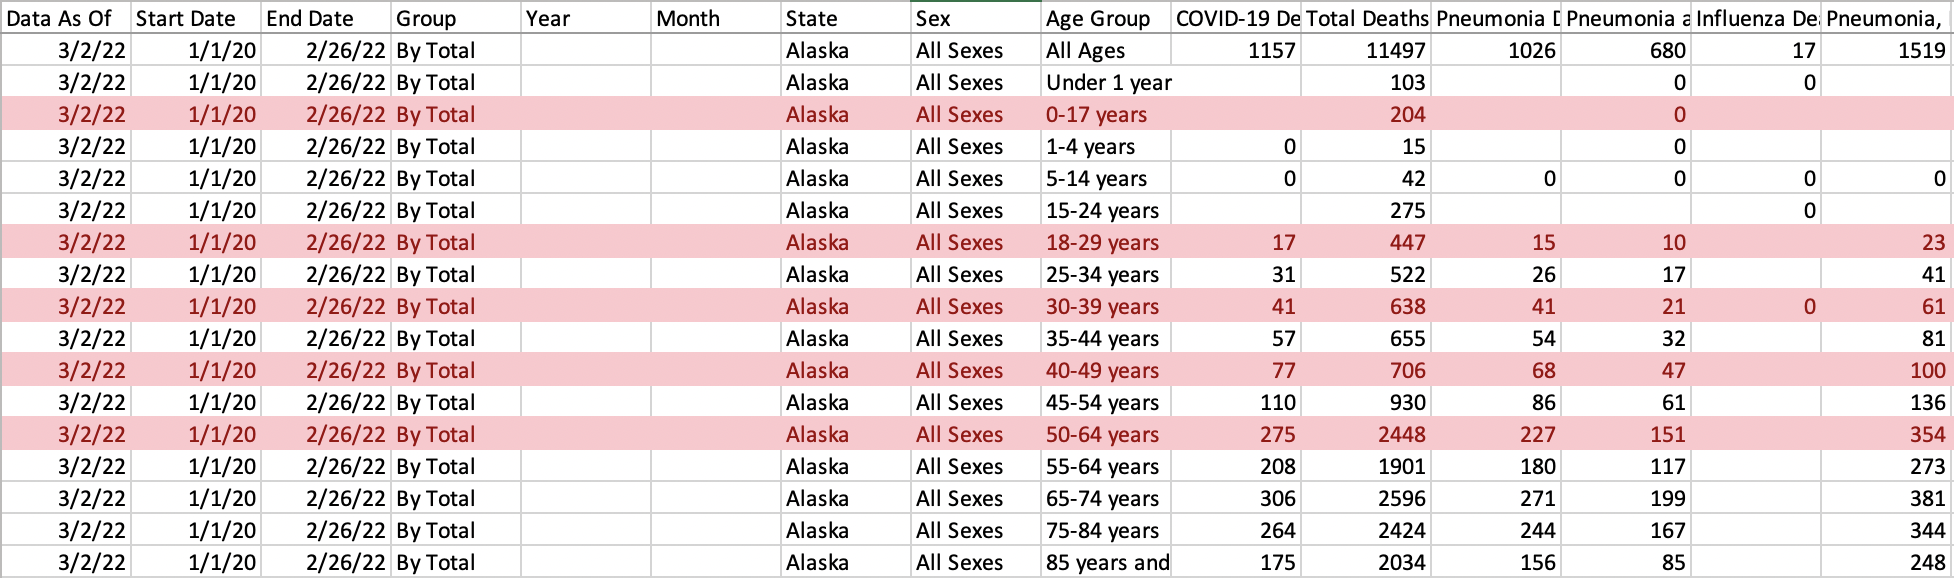

In [84]:
#Removing all the extra age columns as they are consistent with the standard category
data = data[(data['Age_Group'] != '0-17 years') & (data['Age_Group'] != '18-29 years') & (data['Age_Group'] != '30-39 years') & (data['Age_Group'] != '50-64 years') & (data['Age_Group'] != '40-49 years')]
age = data.Age_Group.value_counts()
age

All Ages             4860
Under 1 year         4860
1-4 years            4860
5-14 years           4860
15-24 years          4860
25-34 years          4860
35-44 years          4860
45-54 years          4860
55-64 years          4860
65-74 years          4860
75-84 years          4860
85 years and over    4860
Name: Age_Group, dtype: int64

### Checking for null values in a row 

In [85]:
#Checking for empty entires in each column 
data.isna().sum()

Data_As_Of                                    0
Start_Date                                    0
End_Date                                      0
Group                                         0
Year                                       1944
Month                                      7776
State                                         0
Sex                                           0
Age_Group                                     0
COVID_19_Deaths                           12341
Total_Deaths                               9448
Pneumonia_Deaths                          14440
Pneumonia_and_COVID-19_Deaths             12742
Influenza_Deaths                          10442
Pneumonia_Influenza_or_COVID-19_Deaths    13950
Footnote                                  21430
dtype: int64

The following decisions can be made based on the above data:
    
a. The "Year" and "month" have some null values and can be ignored as these columns are for grouping the data. This will not affect visualization of the data

b. Since there are a lot of missing values in COVID-19 Deaths, We look for the footnote of the respective row, which says that the count in the NaN values be between 1-9. We replace the Nan Values with any random value between 1-9 as it is a small number and will not impact our visualization. The same can be done for all the other missing death counts. The mean cannot be taken in this case as mean of the numbers has all the grouped as well as specific numbers, which might give out a large number distoring the visualization.

c. Footnote column can be ignored. as it does not contain important data. 

### Cleaning the data(Filling the missing values with mean)

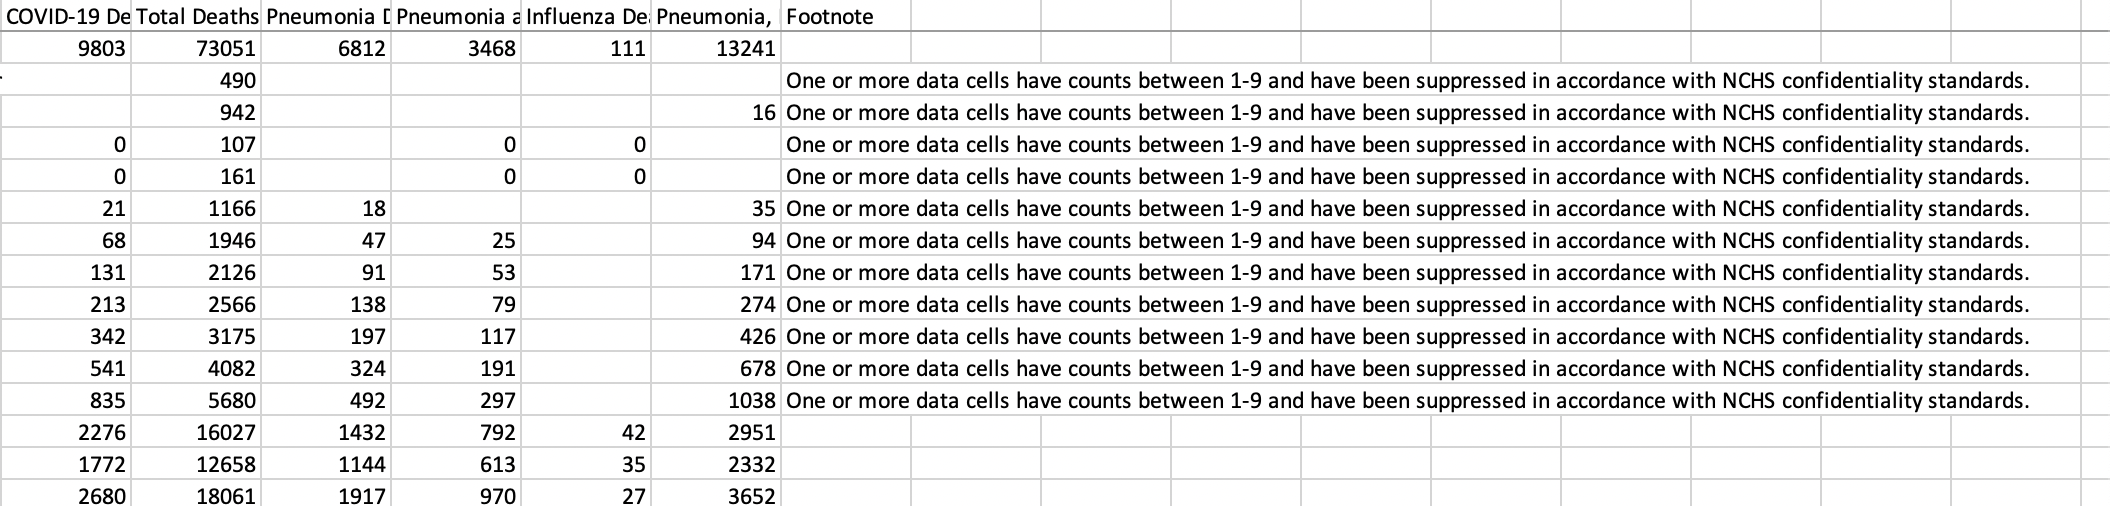

The footnotes for the rows with missing values says the above, this clearly shows that missing values is between 1 to 9. Since, the value between 1 to 9 are very negligibly for visualization, a random number between 1 to 9 is added in place of the NaN values.

Also, these NaN values cannot be filled with the mean as the mean can can be much bigger than the real values and can distort the visualization. The mean for a NaN row value of a state will then consider the mean obtained from the entire column.

In [86]:
#Replacing the NaN Values with a random number between 1 to 9

data['COVID_19_Deaths'] = data['COVID_19_Deaths'].apply(lambda v: v if not np.isnan(v) else random.randint(1, 9))#For COVID-19 Deaths


data['Total_Deaths'] = data['Total_Deaths'].apply(lambda v:v if not np.isnan(v) else  random.randint(1, 9))# for Total_Death

data['Pneumonia_Deaths'] = data['Pneumonia_Deaths'].apply(lambda v: v if not np.isnan(v) else random.randint(1, 9))  #for Pneumonia_Death

data['Pneumonia_and_COVID-19_Deaths'] = data['Pneumonia_and_COVID-19_Deaths'].apply(lambda v: v if not np.isnan(v) else random.randint(1, 9)) #for penumonia and covid-19 death

data['Influenza_Deaths'] = data['Influenza_Deaths'].apply(lambda v: v if not np.isnan(v) else random.randint(1, 9))  #for influenza deaths

data['Pneumonia_Influenza_or_COVID-19_Deaths'] = data['Pneumonia_Influenza_or_COVID-19_Deaths'].apply(lambda v: v if not np.isnan(v) else random.randint(1, 9)) #For Pneumonia, Influenza, or COVID-19 Deaths



In [87]:
data.isna().sum()

Data_As_Of                                    0
Start_Date                                    0
End_Date                                      0
Group                                         0
Year                                       1944
Month                                      7776
State                                         0
Sex                                           0
Age_Group                                     0
COVID_19_Deaths                               0
Total_Deaths                                  0
Pneumonia_Deaths                              0
Pneumonia_and_COVID-19_Deaths                 0
Influenza_Deaths                              0
Pneumonia_Influenza_or_COVID-19_Deaths        0
Footnote                                  21430
dtype: int64

PREPROCESSING CONCLUSION: The COVID-19 Data has 82620 rows and 16 columns. It contains counts of death caused by COVID-19, penumonia and influenza from 2020 to 2022(By Total). The data is also grouped by "All Ages", "All sexes", "United States" as a whole. 
1. In the preprocessing it is observed that no column is null. The Death counts, Year and month are floats. The rest are objects, which discribe aspects of the data.

2. In the Sanity Check, It can be observed that the minimum and maximum values of the death counts are sensible and right. But, the "Age_Group" column has extra values like 0-17, 18-29, 30-49, 40-49, 50-64 which as per CDC as consistent with the standard grouping of the ages. Along with the CDC information, the excel data when analysed for one state shows that this extra data is a part of the standard grouping data and thus can be considered as an extra group and removed from the dataframe. 


3. While checking for the null values in a row, the column with "Year" and "Month" data can be ignored for NaN values as they are grouping columns and does not impact on the visualization and is used to group data. The "Footnote" can also be ignored, as it does not contain crutial data with respect to visualization. The columns with death counts have many NaN values, As the footnote from CDC says that "One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards", This also means that the rows with NaN values have a number between 1 and 9. This rows was randomly filled with 1 to 9 during the cleaning process to get precise reading. 




## Exploratory Data Analysis

### a. COVID-19 Death Case count in all the states of US

Here, we are Getting the data for the "Group" where the data is grouped by year 2020, 2021, 2022. This data is then grouped by  the State to get the COVID-19 Death counts for each state, as "United States" in the States row is a  representation on a country level as a whole, it is eliminated.

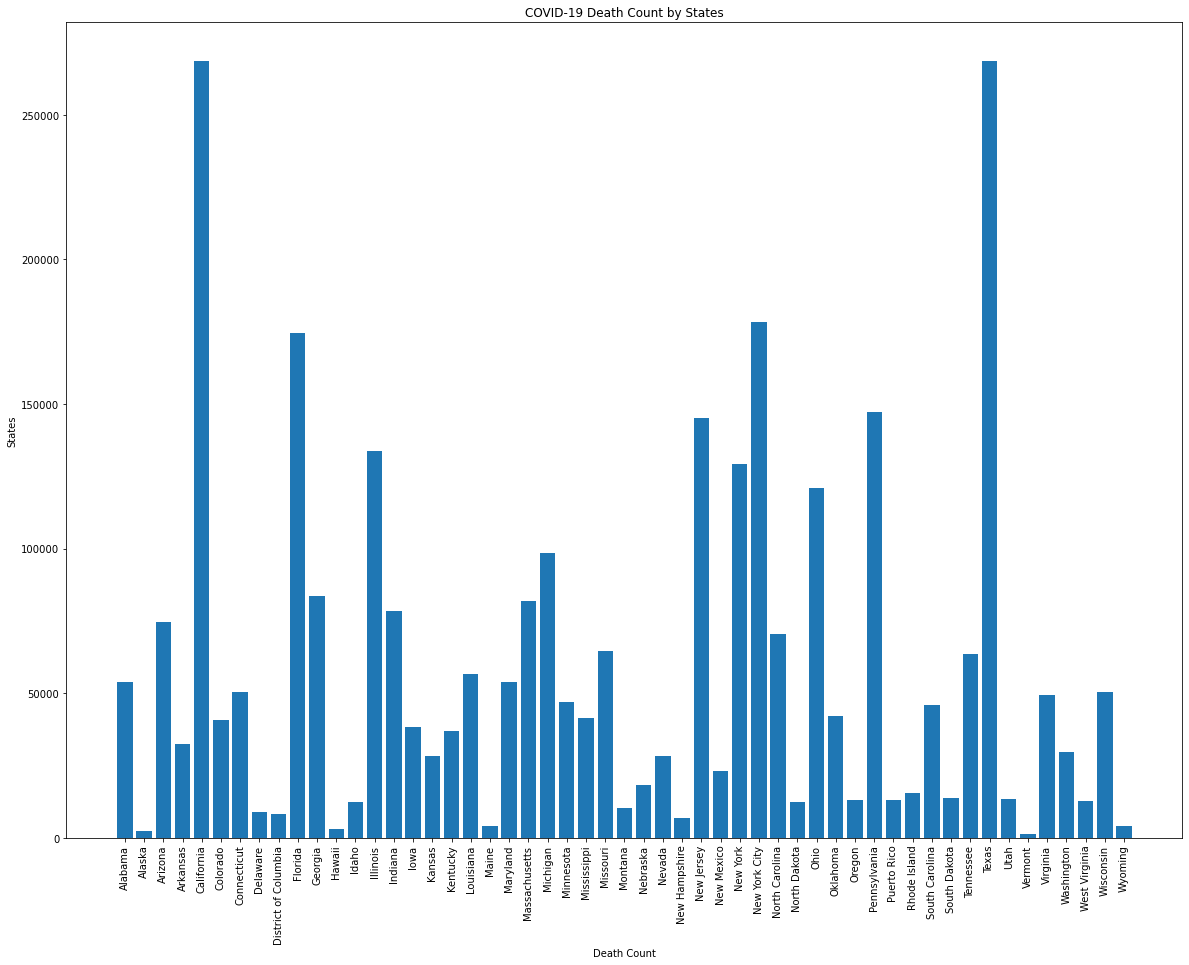

In [88]:
#Getting the data for the "Group" where the data is grouped by year 2020, 2021, 2022. 
#This data is then grouped by State to get the COVID-19 Death counts for each state.
#As United States in the States row is a  representation on a country level, it is eliminated.
data_year = data[data["Year"] == 2020 & 2021 & 2022]  #Filter the dataframe 
data_2020_1 = data_year.groupby(['State'])[['COVID_19_Deaths']].sum()
data_2020_1.drop(['United States'], inplace = True)

plt.figure(figsize=(20, 15))
plt.xticks(rotation=90)
plt.title('COVID-19 Death Count by States')
plt.xlabel('Death Count')
plt.ylabel('States')
plt.bar(x = data_2020_1.index , height = data_2020_1.COVID_19_Deaths)
plt.show()

GRAPH CONCLUSION : The distribution of States with respect to the counts is plotted above in a Bar plot. This visualizations shows that California and Texas had the most COVID-19 death cases from the year 2020 to 2022. It can be assumed that these states had high death counts as these states are the two highly populated states.

### b. COVID-19 Death case count across different age group.

To get the total COVID-19 Death cases across the diffrent age group, the dataframe is filtered to get the "By total"  across all the gender group "All Sexes" and just the age categories by excluding the "All Ages" row that contains extra data. 



Then this filtered dataframe is grouped by "Age_Group" and the sum COVID-19 Case is obtained.

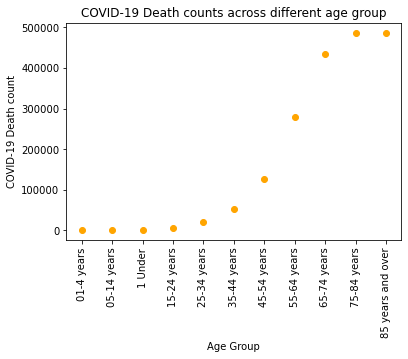

In [89]:
age_death_count = data.loc[(data['Group'] == 'By Total') & (data['Sex'] == 'All Sexes') & (data['Age_Group'] != 'All Ages')]
age_death_count1 = age_death_count.groupby(['Age_Group'])[['COVID_19_Deaths']].sum()
age_death_count2 = age_death_count1.rename(index = {'Under 1 year':'1 Under' ,'1-4 years':'01-4 years', '5-14 years':'05-14 years' })
new_age_death = age_death_count2.sort_index()
plt.scatter(new_age_death.index, new_age_death.COVID_19_Deaths, color='orange' )
plt.title('COVID-19 Death counts across different age group')
plt.xlabel('Age Group')
plt.ylabel('COVID-19 Death count')
plt.xticks(rotation=90)
plt.show()

GRAPH CONCLUSION : The distribution of Different age groups for the COVID-19 Death counts of each in a scatter plot shows that the as the age group increased, the death counts increased. Based on the visualization, it can be assumed that most of the death cases reported to CDC were between the age groups 35-44 to 85 and over. It can also be observed that high rate of cases were reported for the people above 65.

### c. Total death cases across different age group

In order to get the total death counts for all the three medical conditions (COVID, Influenza, and pneumonia), the same filtering as the one done for above is done where a generalized data for for the country for all the gender adn age groups is taken for the "by Total" Group. This dataframe is then plotted in a combination bar plot for multiple variables.

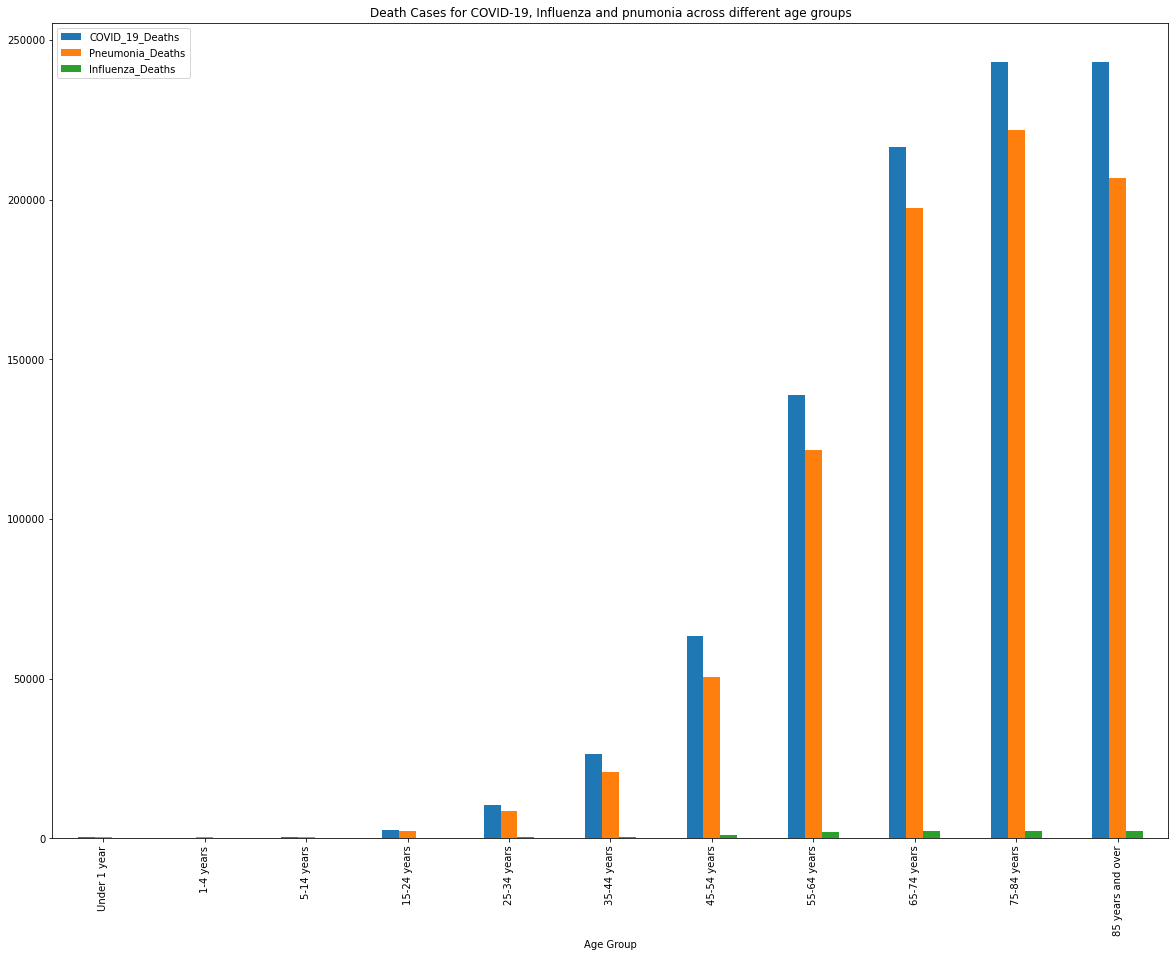

In [90]:
gender_count = data.loc[(data["State"] == "United States") & (data["Sex"] == "All Sexes") & (data["Group"] == "By Total") & (data["Age_Group"] != "All Ages")]
gender_count[["Age_Group", 'COVID_19_Deaths', 'Pneumonia_Deaths', 'Influenza_Deaths']].plot(x='Age_Group', kind='bar', figsize=(20, 15))
plt.title('Death Cases for COVID-19, Influenza and pnumonia across different age groups')
plt.xlabel('Death Count')
plt.xlabel('Age Group')
plt.show()

GRAPH CONCLUSION : The distribution of death counts due to various medical condition across different age groups shows Pneumonia and Covid were the two major reasons of death from the age 35. It can be assumed that pneumonia lead to COVID-19 in a patient that might have caused death of the person.

### d. Correlation between Months and years to obtain the COVID-19 Death counts 

The Data for the all the gender and age groups in united states is filtered from the main database.This is then grouped by the year and month and has been shaped using pivot. The NaN values for after february 2022, for which data was not colected is replaced by 0

In [91]:
count_by_month = data.loc[(data['Sex'] == 'All Sexes') & (data['Age_Group'] == 'All Ages') & (data['State'] == 'United States') ]
group_by_month = count_by_month.groupby(['Year', 'Month'])[['COVID_19_Deaths']].sum()
change = group_by_month.loc[:].reset_index().pivot(index='Year', columns='Month', values='COVID_19_Deaths')
change.fillna(0, inplace = True)
change

Month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Year,,,,,,,,,,,,
2020.0,5.0,24.0,7163.0,65499.0,38312.0,18016.0,31127.0,29901.0,19148.0,24916.0,53230.0,98123.0
2021.0,105473.0,48503.0,23210.0,18749.0,14950.0,7991.0,11188.0,48613.0,62990.0,42150.0,31838.0,44340.0
2022.0,73299.0,25892.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


[Text(0.5, 1.0, 'The US COVID-19 Wave across each month for the year 2020-22')]

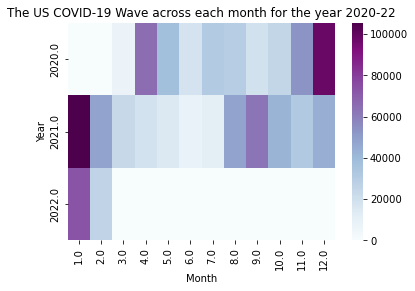

In [92]:
sns.heatmap(change, cmap="BuPu").set(title = 'The US COVID-19 Wave across each month for the year 2020-22')

GRAPH CONCLUSION : From the above headmap, it can be observed that the wrath of COVID-19 has been like a wave where it was at the peak from november 2020 to march 2021. The cases increase again from August 2021 to February 2022.

The same has been done for the state Maryland 

[Text(0.5, 1.0, 'Maryland COVID-19 Wave across each month for the year 2020-22')]

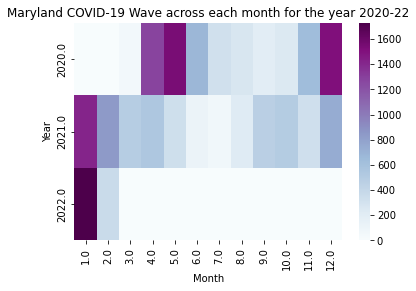

In [93]:
count_by_month = data.loc[(data['Sex'] == 'All Sexes') & (data['Age_Group'] == 'All Ages') & (data['Age_Group'] != 'Under 1 year') & (data['State'] == 'Maryland') ]
group_by_month = count_by_month.groupby(['Year', 'Month'])[['COVID_19_Deaths']].sum()
change = group_by_month.loc[:].reset_index().pivot(index='Year', columns='Month', values='COVID_19_Deaths')
change.fillna(0, inplace = True)
count_by_month
sns.heatmap(change, cmap="BuPu").set(title = 'Maryland COVID-19 Wave across each month for the year 2020-22')

GRAPH CONCLUSION : From the above graph it can be assumed that deaths due to COVID-19 was at peak from Jan 2020 to June 2020. Then there was another high from November 2020 to April 2020, the other from December 2021 to February 2022 in the state of Baltimore.

### CONCLUSION:

The analysis of the provisional COVID-19 deaths dataset highlights that the death counts were high for the states California and Texas affecting people older than 45 the most. At the same time, pneumionia was also one of the causes of death with COVID-19 leading the same. The death counts due to influenza were pretty less compared to the other two. It can also be assumped from the data that the COVID-19 death count was at peak from year jan 2020 to early 2021.
    